# 피처 스케일링

- 목표 : 모델의 성능을 향상시키는데 있음
  - 단, 모델의 방식에 따라 적용하지 않아되 되는 모델이 존재한다
    - XGBoodt, LighGBM 등등 큰 영향이 없다
      - 데이터의 대소관계 영향을 더 받는다
    - 그럼에도 기본적으로는 적용을 검토
  - 성능에 크게 영향을 받는 모델
    - 선형모델


- 피처값들의 범위가 서로 상이하면(최소, 최대값기준)
  - 통상적으로 학습 결과가 낮게 나온다
  - 학습 자체가 이루어 지지 않을수도 있다
- 서로 다른 피처들의 범위값(최소 ~ 최대)이 일치되도록 조정
- 스케일링 후 시각화(산점도,산포도, 히스토그램)를 통해서 분포 확인

In [1]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler 

- StandardScaler
  - 평균 0, 표준편차 1이 되도록 모든 값을 조정하여 변환
  - 정규분포를 따르게 값을 조정
  - X = (X - X평균)/표준편차

- MinMaxScaler
  - 최소값이 0, 최대값이 1이 되도록 조정후 모든 값을 변환
  - 모든 값은 0 ~1 사이에 존재하도록 조정
  - 단점, 이상치(아웃라이어) 있는 경우 대부분값들이 좁은 구간에 몰릴수 있다(압축될수있다)
  - X = ( X - X(min) ) / ( X(max) - X(min) )

- MaxAbsScaler
  - 0을 기준으로 절대값이 최대인값을 1로 설정
  - 나머지값들은 이 기준에 맞처서 0~ 1사이로 변환 처리
  - 이상치에 큰 영향을 받을수 있다
  - MinMax와 유하사나 사용 빈도가 떨어짐

- RobustScaler 
  - 중앙값을 0, IQR(사분위수)기준 전체 데이터의 50%가 중앙에 밀집되도록 변환처리 -> 중앙에 흩어진 범위가 1이 되도록 조정한다
  - 아웃라이어에 영향을 최소화 시켰다
  - StandardScaler와 비교하면 흩어진 정도가 저 좁게 형성되어 있다. 동일값을 더 넓게 분포시켜놓았다


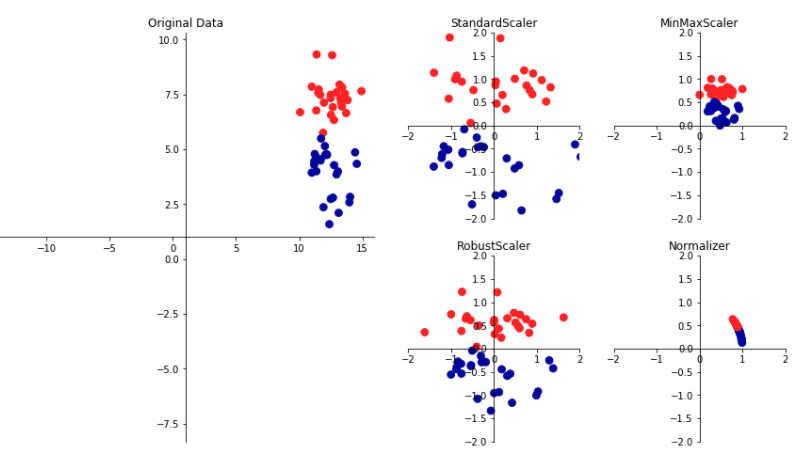

In [3]:
from IPython.display import Image

Image('/content/drive/MyDrive/cloud_ai/share/3.머신러닝/res/scaler.png', width=500)

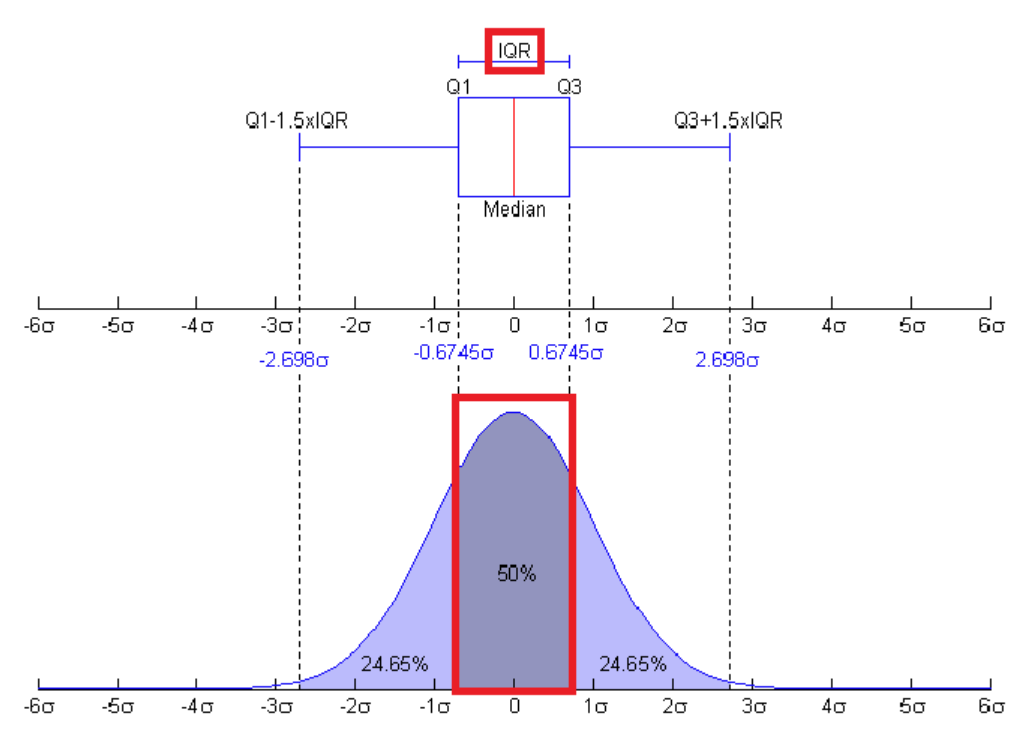

In [4]:
Image('/content/drive/MyDrive/cloud_ai/share/3.머신러닝/res/IQR_50.png', width=500)

# 데이터 준비

In [5]:
import numpy as np

In [8]:
arr = np.array([
    [1, 2,  3,  4],
    [5, 6,  7,  8],
    [9, 10, 11, 12]
])
arr2 = np.array([
    [1, 2,  3,  4],
    [5, 60, 70, 8],
    [9, 10, 11, 12]
])
arr

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

# MinMaxScaler

In [7]:
MinMaxScaler().fit_transform(arr)

array([[0. , 0. , 0. , 0. ],
       [0.5, 0.5, 0.5, 0.5],
       [1. , 1. , 1. , 1. ]])

In [9]:
MinMaxScaler().fit_transform(arr2)
# 열단위, 세로단위, 컬럼단위로 스케일링 적용되었다

array([[0.        , 0.        , 0.        , 0.        ],
       [0.5       , 1.        , 1.        , 0.5       ],
       [1.        , 0.13793103, 0.11940299, 1.        ]])

In [10]:
arr2[ : , 2:3] 

array([[ 3],
       [70],
       [11]])

In [11]:
# fit() -> transform()을 하는 경우는 특정 컬럼(열)단위로 스케일링을 하고, 이 학습된 스케일러를
# 다른 컬럼에 적용할때 사용하는 방식
mm_scaler = MinMaxScaler().fit( arr2[ : , 2:3] )
# mm_scaler는 3이 0이 되고, 70이 1이 되는 스케일러

In [14]:
# 3번 컬럼(열)의 스케일러는 모든 컬럼에 적용
# 음수가 나온 이유는 최소값이 3을 기준으로 만들어져서 그 이하값이 음수가 되었다
# 이 방법은 데이터에 따라 의미를 가질수 있고, 방법론만 표기한것임
np.hstack((
  mm_scaler.transform( arr2[ : , 0:1] ),
  mm_scaler.transform( arr2[ : , 1:2] ),
  mm_scaler.transform( arr2[ : , 2:3] ),
  mm_scaler.transform( arr2[ : , 3:4] )
))

array([[-0.02985075, -0.01492537,  0.        ,  0.01492537],
       [ 0.02985075,  0.85074627,  1.        ,  0.07462687],
       [ 0.08955224,  0.10447761,  0.11940299,  0.13432836]])

# StandardScaler

In [15]:
StandardScaler().fit_transform(arr2)

array([[-1.22474487, -0.85721515, -0.83674928, -1.22474487],
       [ 0.        ,  1.4027157 ,  1.4057388 ,  0.        ],
       [ 1.22474487, -0.54550055, -0.56898951,  1.22474487]])

# MaxAbsScaler

In [16]:
MaxAbsScaler().fit_transform(arr2)

array([[0.11111111, 0.03333333, 0.04285714, 0.33333333],
       [0.55555556, 1.        , 1.        , 0.66666667],
       [1.        , 0.16666667, 0.15714286, 1.        ]])

# RobustScaler

In [17]:
RobustScaler().fit_transform(arr2)

array([[-1.        , -0.27586207, -0.23880597, -1.        ],
       [ 0.        ,  1.72413793,  1.76119403,  0.        ],
       [ 1.        ,  0.        ,  0.        ,  1.        ]])